# Analysis of US Coastguard GPS disruption data

In [46]:
import pandas as pd

In [47]:
GPS_disruption_data=pd.read_csv('gps_disruptions_per_country.csv',parse_dates=['local_date'])
sovereign_states=pd.read_csv('sovereign_states.csv')


## Introduction

Global Navigation Satellite Systems (GNSS), of which the United States Global Positioning System (GPS) is the most established, are key to a number of applications. As they depend on weak signals coming to terrestrial receivers from satellites in Medium Earth Orbit (MEO), they are also highly vulnerable to interference. GPS disruptions due to a number of reasons, including interference, are reported by users to the United States Coastguard Navigation centre, which publishes the reports on their website. The Blacket review by the United Kingdom's [Government Office for Science (2018)](#Government-Office-for-Science-(2018)) lists different GPS dependencies and vulnerabilities from a UK perspective.  

GPS was originally designed for military use, and despite its numerous civilian applications it is also used for a number of modern military systems, particularly for Unmanned Aerial Vehicles (UAV). Therefore, Electronic warfare (EW) techniques such as jamming and spoofing of GPS signals are often employed in conflict zones as a counter measure against UAVs and other GPS equiped systems. 

### Details on jammer location
[Murrian et al (2021)](#Murrian-MJ,-Narula-L,-Iannucci-PA,-et-al.-(2021)) use data from the FOTON GNSS receiver on board the International Space Station, to detect and geolocate strong GNSS jammers globally between 50N and 50S. They find a weak jamming signal from Syria at the end of 2017, which becomes stronger into 2018. By the second half of 2019 another strong jamming signal appears from Libya. The strengthening of jamming in Syria must be part of EW countermeasures following a combined UAV attack against the russian naval base at Tartus and the air base at Hmeimim in January 2018,see story by [Eshel T. (2018)](#Eshel-T.-(2018)). Commentary from Russia after the report did focus on the accuracy of the GPS coordinates programmed as targets for the UAV's, as quoted in [Trevithick(2018)](#Trevithick,-J.-(2018)) Similarly, the jamming in Libya could be part of countermeasures to UAV attacks in the civil war there, as reported in [Anadolu Agency (2019) news item](#Anadolu-Agency-(31-October-2019)) . Both of those jamming signals are observed for GNSS bands L1 and L2. Additional interference is originating from mainland China on band L2 only, and was present since March 2017.

[Perez Marcos et al (2018)](#Pérez-Marcos,-E.,Konovaltsev,-A.,-Caizzone,-S.,-Cuntz,-M.,-Yinusa,-K.,-Elmarissi,-W.-and-Meurer,-M.-(2018)) use data from a GNSS receiver on board a cargo vessel crossing the Mediterranean, the Red Sea, Persian Gulf and Indian Ocean and on to the far East and back. They detect interference in a number of places along the route, the affected location of relevance here is the Suez canal. This was detected in September 2017. 

### Areas where GPS receivers suffer from jamming
Another analysis focused on the effect on commercial shipping from the [NATO Shipping Centre (2022)](#NATO-Shipping-Centre-(2022)) shows the affected area in the Central Mediterranean as an ellipse overlayed on a maritime routes map (probably AIS) centred on Malta and reaching the southern tip of Sicily, with GPS issues there said to be dating since the summer of 2019. The main maritime routes from western to eastern meditteranean go between Malta and Sicily and therefore through this ellipse.  In the Eastern Mediterranean, one ellipse is centred on Limassol Cyprus, covering routes out of Limassol but also routes from the west, past Cyprus to Beirut Lebanon. Another centred on Port Said Egypt, covering traffic in and out of the Suez canal. One off shore from Lebanon covering traffic to and from Beirut and finally offshore from Mersin and Iskenderun, Turkey covering the intersection of the route from Mersin to the south, with the route from Iskenderun west.

The effect on civilian aviation in the Mediterranean sea and beyond is shown in [maps produced by the Airbus Skywise system for the second half of 2020](#Eurocontrol-Aviation-Intelligence-Unit,-Think-Paper-#9-(2021)), and for the whole of 2021 and included in Eurocontrol reports. The Airbus Skywise maps also show interference near the Russia Ukraine border, and elsewhere in Russia. [Gerhard Berz (2022)](#Berz-G.-EUROCONTROL-(2022)) of Eurocontrol mentions that the 2021 map matches pilot reports and that the interference locations have been stable since 2018. He also provides a different jamming scenario, from a private yacht in the Netherlands equipped with an anti paparazzi drone jammer detected by analysing ADS-B data. 

Theoretically the range of the jammer should be much greater for airborne GNSS receivers compared to GNSS receivers on land or on ships. An analysis of the expected effect of a military jamming exercise at West Freugh published by [Ofcom (2022)](#Ofcom-(2022)) lists a range of up to 7 km, but directional, for GNSS receivers at 2m AMSL, which becomes  up to 50 km in all directions for reveivers at 5,000ft AMSL and up to 90 km at 10,000ft AMSL and above. Such [approved GPS Testing(2022)](#Navigation-Center,-United-States-Coast-Guard-(2022)) by the US military is also published in advance, and it could be one of the sources of interference in US territory along with the use of illegal jammers by civilians. 

## Methods

Data from the U.S. Coastguard Navigation Centre list of disruptions was webscraped, and the location identified by using third party lists of placenames as documented in the README file of this github repository, using Python code within the [GPS_data_processing.ipynb](./GPS_data_processing.ipynb) jupyter notebook of this repository.

Using [Murrian et al (2021)](#Murrian-MJ,-Narula-L,-Iannucci-PA,-et-al.-(2021)) and the [NATO Shipping Centre (2022)](#NATO-Shipping-Centre-(2022)) we can safely group together Libya, Malta and southern Italy as all within range of interference from Libya. While the NATO report is not so unequivocal about Cyprus, Lebanon and South East Turkey all being within range of Syria based jammers, we shall also make this assumption. 


[Perez Marcos et al (2018)](#Pérez-Marcos,-E.,Konovaltsev,-A.,-Caizzone,-S.,-Cuntz,-M.,-Yinusa,-K.,-Elmarissi,-W.-and-Meurer,-M.-(2018)) detect interference in Egypt in September 2017, well before the strengthening of interference from Syria in 2018. This combined with the greater distance from Syria will be the basis of treating reports from Egypt separately to the rest of the Eastern Mediterranean reports.

In [48]:
jammmer_effect=pd.concat([pd.DataFrame({'Source':'Syria','destination':'CY'},index=[0]), pd.DataFrame({'Source':'Libya','destination':'MT'},index=[1]),\
pd.DataFrame({'Source':'Libya','destination':'IT'},index=[2]),\
                          pd.DataFrame({'Source':'Libya','destination':'LY'},index=[3]),\
                          pd.DataFrame({'Source':'Suez','destination':'EG'},index=[4]),\
                          pd.DataFrame({'Source':'US','destination':'US'},index=[5]),\
                         pd.DataFrame({'Source':'Syria','destination':'TR'},index=[6]),\
                         pd.DataFrame({'Source':'Syria','destination':'LB'},index=[7]),
                         ])



In [49]:
jammmer_effect

,Source,destination
0,Syria,CY
1,Libya,MT
2,Libya,IT
3,Libya,LY
4,Suez,EG
5,US,US
6,Syria,TR
7,Syria,LB


In [50]:
GPS_interference=pd.merge(GPS_disruption_data[GPS_disruption_data['Cause'].str.contains('Interference')],sovereign_states,left_on='coalesced_country', right_on='Code')
GPS_interference_assigned=pd.merge(GPS_interference,jammmer_effect,left_on='coalesced_country', right_on='destination')
#GPS_interference

## Results

### Check causes

In [51]:
GPS_disruption_data.groupby('Cause').count()['Disruption Date/Time']

Cause
GPS Testing                     8
ICD_Violation                   6
IODC_10-Bit                     1
Insufficient Information       62
Mapping Issue                  33
None                            5
Other                           3
Unintentional Interference      5
Unknown Interference          187
User Equipment                109
Name: Disruption Date/Time, dtype: int64

In [52]:
GPS_disruption_data[GPS_disruption_data['Cause']=='GPS Testing']

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,coalesce,coalesced_country
32,05/05/2022 5:38:07 CST,Sandia Crest ALBUQUERQUE,Communications,USER: issue is intermittent affecting the foll...,GPS Testing,05/25/2022,USER: issue is intermittent affecting the foll...,: The GPS Operations Center reviewed the GPS C...,2022-05-05,US ABQ,US
310,09/06/2018 1359 CST,Gulf of Mexico,Marine,User: Multiple vessels in our area experienced...,GPS Testing,05/07/2019,User: Multiple vessels in our area experienced...,: The GPS Operations Center reviewed the GPS C...,2018-09-06,MX,MX
332,05/10/2018 0008 GMT,"Fairbanks, Alaska",Other,"User: Since 10 May, several balloon flights ha...",GPS Testing,05/08/2019,"User: Since 10 May, several balloon flights ha...",: The GPS Operations Center reviewed the GPS C...,2018-05-10,US AK,US
364,10/18/2017 0041 UTC,"Addison, TX",Aviation,User: Several pilots have reported a problem w...,GPS Testing,05/20/2019,User: Several pilots have reported a problem w...,: The GPS Operations Center reviewed the GPS C...,2017-10-18,US TX,US
379,08/08/2017 0600 PST,"San Clemente Island, CA",Marine,User: For the last two weeks in our area of op...,GPS Testing,05/20/2019,User: For the last two weeks in our area of op...,: The GPS Operations Center reviewed the GPS C...,2017-08-08,US CA,US
401,04/02/2017 1007 PST,"Channel Islands, CA",Marine,"User: Several systems, across all of our asset...",GPS Testing,05/20/2019,"User: Several systems, across all of our asset...",: The GPS Operations Center reviewed the GPS C...,2017-04-02,US CA,US
410,02/06/2017 0000 CET,"Oberpfaffenhofen, Germany",NaN,User: The reason I am contacting you relates t...,GPS Testing,05/20/2019,User: The reason I am contacting you relates t...,: The GPS Operation Center (GPSOC) stated thes...,2017-02-06,DE,DE
411,01/26/2017 18:00 GMT,United Kingdom,Timing,User: This has been happening over the last 4 ...,GPS Testing,05/20/2019,User: This has been happening over the last 4 ...,: 5 January 2017 the Civil GPS Service Interfa...,2017-01-26,UK,UK


### Interference per country

<AxesSubplot: title={'center': 'Locations affected by interference'}, ylabel='Country name (using title case)'>

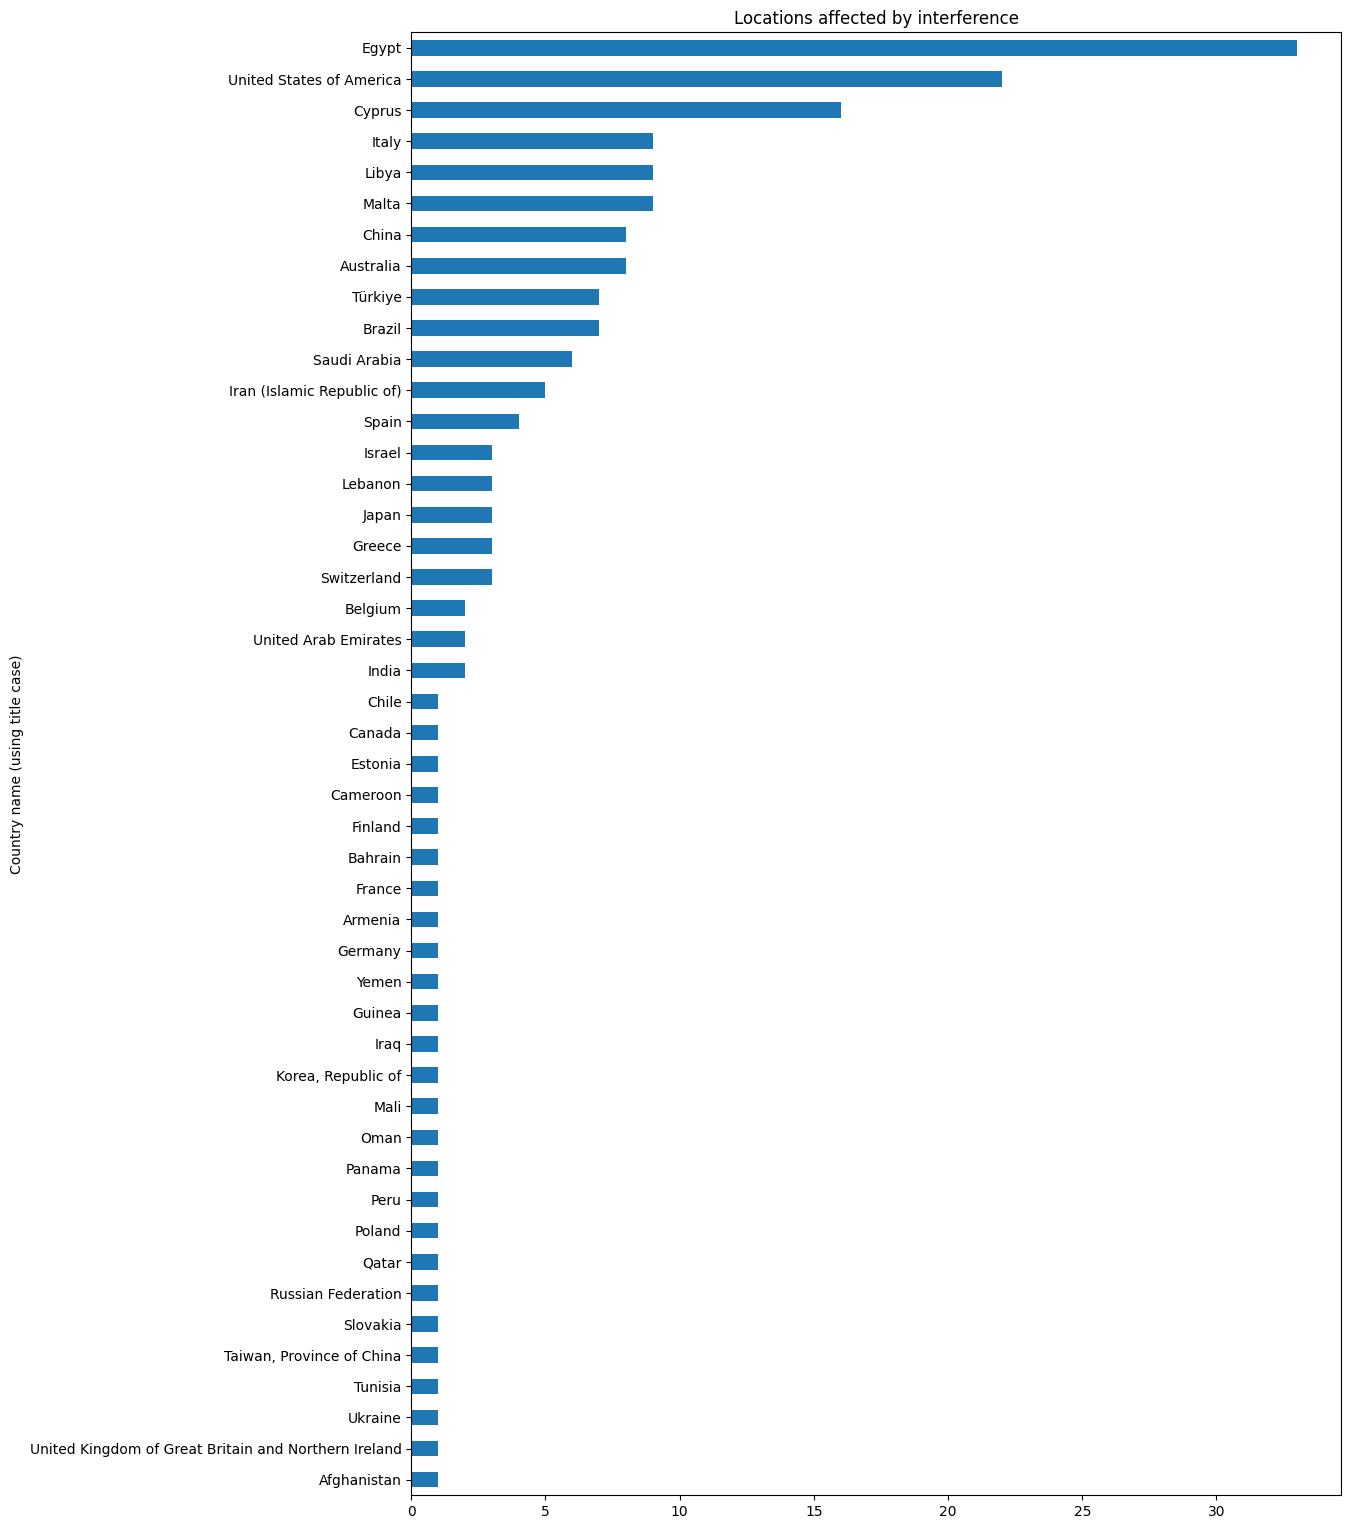

In [53]:
GPS_interference.groupby('Country name (using title case)').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,19],title='Locations affected by interference')

The majority of the interference cases reported are from Egypt (Suez), United States, and countries withing range of Syria and Libya. 

### Investigate country grouping per source

<AxesSubplot: ylabel='Source'>

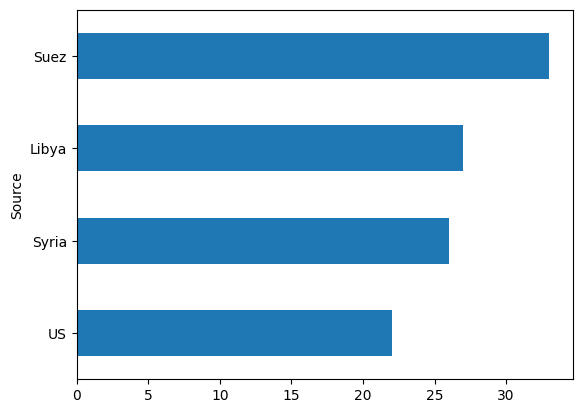

In [54]:
GPS_interference_assigned.groupby('Source').count()['Disruption Date/Time'].sort_values().plot(kind='barh')

<AxesSubplot: ylabel='coalesce'>

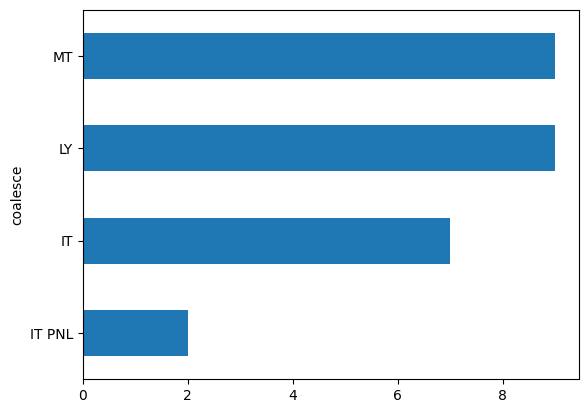

In [55]:
GPS_interference_assigned.query('Source=="Libya"').groupby('coalesce').count()['Disruption Date/Time'].sort_values().plot(kind='barh')

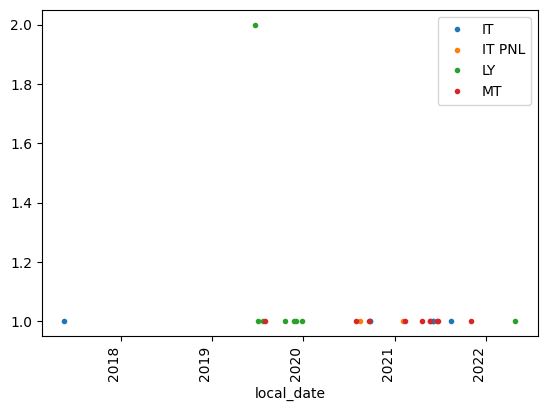

In [56]:
GPS_interference_assigned.query('Source=="Libya"').groupby(['coalesce','local_date']).count()['Code'].unstack().transpose()\
.plot(marker='.',ls=' ', rot=90).legend()


Check detailed location of early italian case, not helping.

<AxesSubplot: ylabel='coalesce'>

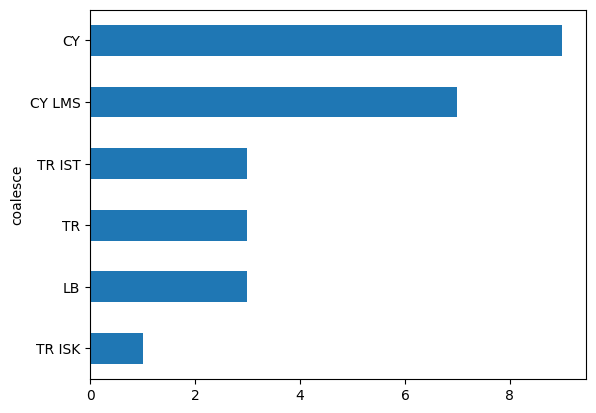

In [57]:
GPS_interference_assigned.query('Source=="Syria"').groupby('coalesce').count()['Disruption Date/Time'].sort_values().plot(kind='barh')

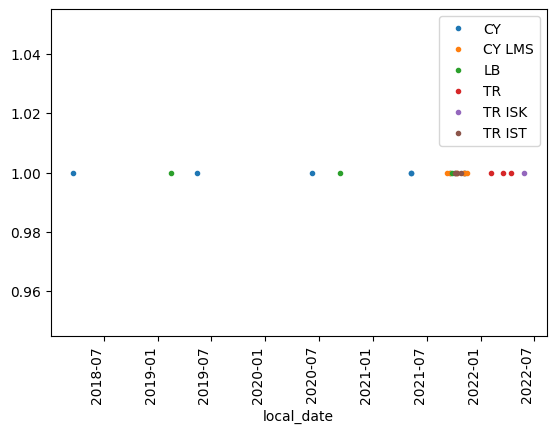

In [58]:
GPS_interference_assigned.query('Source=="Syria"').groupby(['coalesce','local_date']).count()['Code'].unstack().transpose()\
.plot(marker='.',ls=' ', rot=90).legend()

Turkey cases suspiciously concentrated at the end. Check detailed location

### Timeline

<AxesSubplot: xlabel='local_date'>

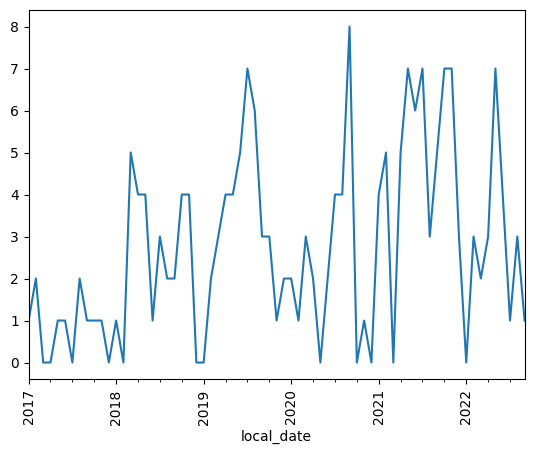

In [59]:
GPS_interference.resample('M', on='local_date').count()['Disruption Date/Time'].plot(rot=90)


<AxesSubplot: xlabel='local_date'>

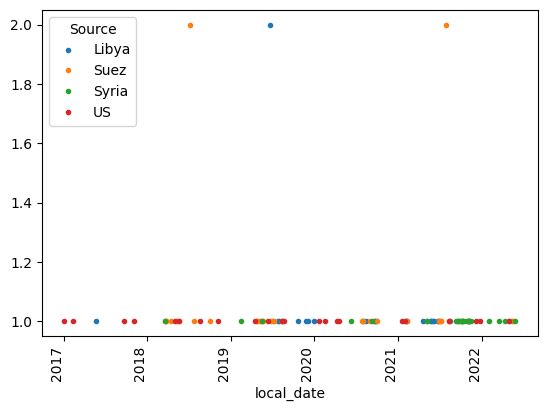

In [60]:
GPS_interference_assigned.groupby(['Source','local_date']).count()['Cause'].unstack().transpose().plot(rot=90,ls='',marker='.')

Syria
Libya
Suez
US


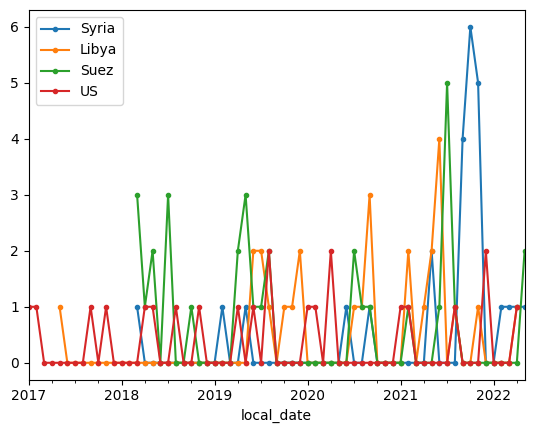

In [61]:
for source_country in jammmer_effect['Source'].unique():
    print(source_country)
    GPS_interference_assigned[GPS_interference_assigned['Source']==source_country].rename(columns={'Disruption Date/Time':source_country})\
    .resample('M', on='local_date').count()[source_country].plot(marker='.').legend()


## Discussion
[Murrian et al (2021)](#Murrian-MJ,-Narula-L,-Iannucci-PA,-et-al.-(2021)) global analysis only covers up to 50N which is the latitude of Kharkiv in Eastern Ukraine. The active conflict at the time was to the south of this location, in Donbass. Their heatmap shows a 'footpring' of detected interference to the west of the jammer location. Since the Syria is well to the west of Libya and jamming in Libya started much later, they are easier to discriminate. But Kharkiv would be nearly directly above syria to the north, and assuming interference in or near Donbass hass been present for as long as in Syria, it would be harder to discriminate the two. The map in [Gerhard Berz (2022)](#Berz-G.-EUROCONTROL-(2022)) shows significant RFI detected further north and away from the ukrainian border, nearer Voronezh, and a separate area of weaker RFI in Moscow. Both of those are well north of 50N. 

[Gerhard Berz (2022)](#Berz-G.-EUROCONTROL-(2022)) of Eurocontrol comment that the interference locations shown in the 2021 Airbus Skywise map have been stable since 2018 would be consistent with [Murrian et al (2021)](#Murrian-MJ,-Narula-L,-Iannucci-PA,-et-al.-(2021)) regarding Syria, Suez and China but contradicts the emergence of strong interference from Libya in the middle of 2019. 

But [NATO Shipping Centre (2022)](#NATO-Shipping-Centre-(2022)) confirmss the mid 2019 onset. Note that their ellipse centred on Malta showing area affected does not extend down to Libya, but the NATO ellipses should be interpreted as the overlap between areas affected by interference, and busy maritime routes. This would also allow for uniting the less busy area between the three ellipses in the North Eastern Mediterranean, to show the entire triangle between Mersin, Beirut and Limassol as affected by the jammers on or near the Syrian coast.



## Financial support - Conflict of Interest

This work was done in my own personal time, using information in the public domain, my personal computing resources and Github Codespaces, and not funded by my current or previous employers or other parties.

## References

##### Anadolu Agency (31 October 2019) 
[Libya: Haftar forces attack Misrata Air College. College bombed five times by unmanned aerial vehicles, says source with GNA forces.](https://www.aa.com.tr/en/africa/libya-haftar-forces-attack-misrata-air-college/1631348)

##### Berz G. EUROCONTROL (2022) 
[Monitoring GNSS RF Interference, NM User Forum, Monitoring CNS Infrastructure Performance](https://www.eurocontrol.int/sites/default/files/2022-02/eurocontrol-nm-user-forum-gerhard-berz.pdf)
  

##### Eurocontrol Aviation Intelligence Unit, Think Paper #9 (2021) 
[Does Radio Frequency Interference to Satellite Navigation pose an increasing threat to Network efficiency, cost-effectiveness and ultimately safety?](https://www.eurocontrol.int/publication/eurocontrol-think-paper-9-radio-frequency-interference-satellite-navigation-active)

##### Eshel T. (2018)
[Defense update: Russian Forces in Syria Repelled Massive Drone Attack on Hmeimim and Tartus](https://defense-update.com/20180108_uav_attack.html)

##### Government Office for Science (2018) 
[Satellite-derived Time and Position: A Study of Critical Dependencies](https://www.gov.uk/government/publications/satellite-derived-time-and-position-blackett-review)

##### Murrian MJ, Narula L, Iannucci PA, et al. (2021)
First results from three years of GNSS interference monitoring from low Earth orbit. NAVIGATION. 2021;68:673–685. https://doi.org/10.1002/navi.449

##### NATO Shipping Centre (2022)
[Threat to commercial shipping in the Mediterranean](https://shipping.nato.int/nsc/operations/news/2021/threat-to-commercial-shipping-in-the-mediterranean)

##### Navigation Center, United States Coast Guard (2022)
[Approved GPS Testing](https://navcen.uscg.gov/sites/default/files/pdf/gps/GPS_Interference.pdf)

##### Ofcom (2022) 
[Ofcom Website > Spectrum > Spectrum information > GPS jamming exercises](https://web.archive.org/web/20220121015758/https://www.ofcom.org.uk/spectrum/information/gps-jamming-exercises)

##### Pérez Marcos, E.,Konovaltsev, A., Caizzone, S., Cuntz, M., Yinusa, K., Elmarissi, W. and Meurer, M. (2018) 
[Interference and Spoofing Detection for GNSS Maritime Applications using Direction of Arrival and Conformal Antenna Array](https://elib.dlr.de/127019/1/E2_PerezMarcos_Emilio_final.pdf)

##### Trevithick, J. (2018)
[Russia Implies Drone Swarm Attack On Its Base in Syria Linked to US P-8 Patrol Plane](https://www.thedrive.com/the-war-zone/17527/russia-is-trying-to-link-the-drone-swarm-attack-in-syria-to-a-us-p-8-patrol-plane)